In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [ ]:
data =pd.read_csv("/content/winequality-red.csv",sep=";")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


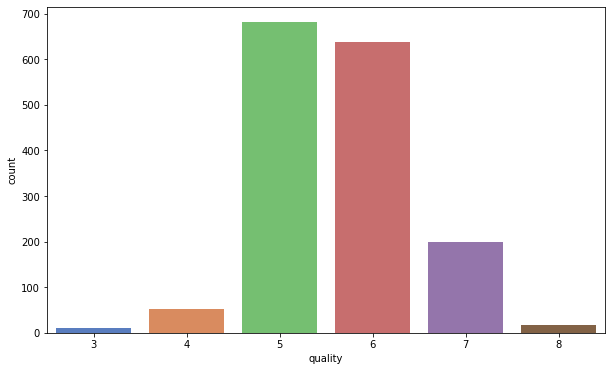

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data["quality"], palette="muted")

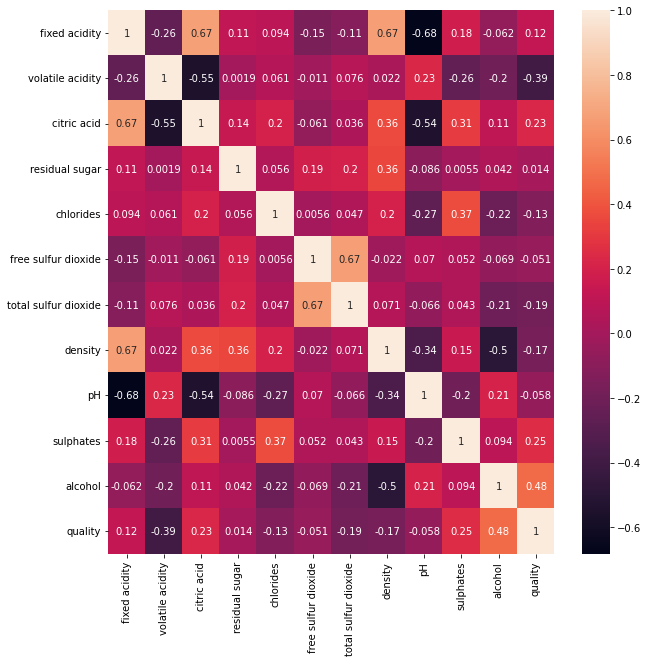

In [ ]:
fig, ax =plt.subplots(figsize=(10,10))
dataplot = sns.heatmap (data.corr(), annot = True, ax=ax)

In [ ]:
category=[]
for i in data["quality"]:
  if i<=5:
    category.append("bad")
  if i>=6:
    category.append("good")
  
cate=pd.DataFrame(data=category,columns=["category"])
data=pd.concat([data,cate],axis =1)
data.drop(columns="quality",axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


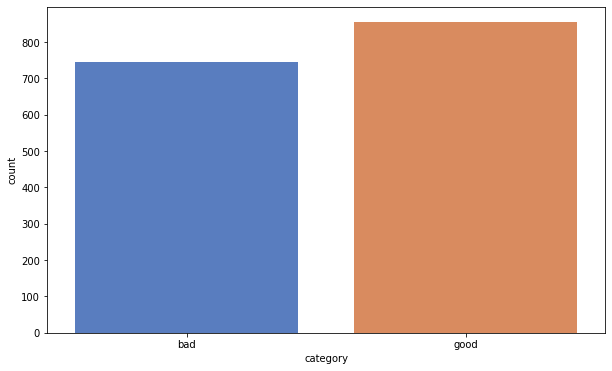

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data["category"], palette="muted")

In [ ]:
X = data.drop('category', axis = 1)
Y= data['category']

In [ ]:
Y.value_counts()

good    855
bad     744
Name: category, dtype: int64

In [ ]:
# Separate cross-validation
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, GridSearchCV
skf = StratifiedShuffleSplit(n_splits=10,random_state=5)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
# TRAINING WITH PARAMETER 1
classifier = SVC(C=0.1, gamma=0.1, kernel='rbf')
all_accuracies = cross_val_score(
    estimator=classifier,
    X=X,
    y=Y,
    cv=skf,
    n_jobs=-1)
print(all_accuracies)
print("mean acc:",np.mean(all_accuracies))

[0.54375 0.55625 0.55625 0.56875 0.54375 0.5375  0.55    0.5625  0.525
 0.53125]
mean acc: 0.5475


In [ ]:
# TRANING WITH PARAMETER 2
classifier = SVC(C=1, gamma=0.3, kernel='rbf')
all_accuracies = cross_val_score(
    estimator=classifier,
    X=X,
    y=Y,
    cv=skf,
    n_jobs=-1)
print(all_accuracies)
print("mean acc:",np.mean(all_accuracies))

[0.7375  0.63125 0.7375  0.70625 0.69375 0.69375 0.71875 0.69375 0.68125
 0.725  ]
mean acc: 0.701875


In [ ]:
# TUNING PARAMETER using GridSearchCV
# %%
pipe_svm = Pipeline([('clf', svm.SVC())])
params_C=np.geomspace(pow(2,-5),pow(2,15),num=21)
params_g=np.geomspace(pow(2,-15),pow(2,3),num=19)
grid_params = dict(clf__C=params_C,
                   clf__gamma=params_g,
                   clf__kernel=['rbf'])
gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=grid_params,
                      scoring='accuracy',
                      cv=skf,
                      n_jobs=-1)
gs_svm.fit(X, Y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=5, test_size=None,
            train_size=None),
             estimator=Pipeline(steps=[('clf', SVC())]), n_jobs=-1,
             param_grid={'clf__C': array([3.1250e-02, 6.2500e-02, 1.2500e-01, 2.5000e-01, 5.0000e-01,
       1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
       3.2000e+01, 6.4000e+01, 1.2800e+02, 2.5600e+02, 5.1200e+02,
       1.0240e...
       3.2768e+04]),
                         'clf__gamma': array([3.05175781e-05, 6.10351563e-05, 1.22070313e-04, 2.44140625e-04,
       4.88281250e-04, 9.76562500e-04, 1.95312500e-03, 3.90625000e-03,
       7.81250000e-03, 1.56250000e-02, 3.12500000e-02, 6.25000000e-02,
       1.25000000e-01, 2.50000000e-01, 5.00000000e-01, 1.00000000e+00,
       2.00000000e+00, 4.00000000e+00, 8.00000000e+00]),
                         'clf__kernel': ['rbf']},
             scoring='accuracy')

In [ ]:
print(gs_svm.best_score_)
print(gs_svm.best_params_)

0.78
{'clf__C': 2047.9999999999989, 'clf__gamma': 0.0004882812500000003, 'clf__kernel': 'rbf'}
